# Introduction
**Investigate a Dataset-Titanic Project**

Hello, my name is Tae Hyun Yun. As a part of the Udacity Data Analyst program,
I am going to use the Titanic data set provided at [Kaggle](https://www.kaggle.com/c/titanic/data) to answer what could have caused the deaths that happened on that day.

# What affected their survival rate the most?

Like all other scientific studies, a hypothesis for this test seems fitting.
My hypothesis is that: **Gender, age, and Pclass will have the largest impact on the people's social standing in that order.**
To do this I want to use the pandas module and the numpy module and will load it in code below:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline  

# Data Wrangling

Now here, we take the csv data and convert it into a readable data frame (df).
We will subset the data into useful sets, dividng survivors and the dead apart.


In [2]:
df = pd.read_csv('train.csv')
#lets subset
lp=df[df['Survived']==1]
dp=df[df['Survived']==0]

# Age Distribution

I am doing this for the survivors first.
Below, When describe function is used for Age, it show error.

In [3]:
lp.Age.describe()

C:\Users\Tae Hyun Yun\OneDrive\Documents\Spring 2017\dATA ANALYST\Project 0\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

The mean shows 28.343.

To fix this, I will have to subset again and drop the na values using isfinite function.


In [4]:
agedf=df[np.isfinite(df['Age'])]
agelp=agedf[agedf['Survived']==1]
agedp=agedf[agedf['Survived']==0]

In [5]:
agelp.Age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
agedp.Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

That fixed it!

To graph the comparison bar plot for age, I have divided the age by increments of 10 for both ages.

In [7]:
age_under_10=[]
age_under_20=[]
age_under_30=[]
age_under_40=[]
age_under_50=[]
age_under_60=[]
age_over_60=[]
for i in agelp.Age:
    if i<10:
        age_under_10.append(i)
    elif i<20:
        age_under_20.append(i)
    elif i<30:
        age_under_30.append(i)
    elif i<40:
        age_under_40.append(i)
    elif i<50:
        age_under_50.append(i)
    elif i<60:
        age_under_60.append(i)
    else:
        age_over_60.append(i)
lnum_10=len(age_under_10)
lnum_20=len(age_under_20)
lnum_30=len(age_under_30)
lnum_40=len(age_under_40)
lnum_50=len(age_under_50)
lnum_60=len(age_under_60)
lnum_over=len(age_over_60)
lnumage=[lnum_10,lnum_20,lnum_30,lnum_40,lnum_50,lnum_60,lnum_over]

In [8]:
dage_under_10=[]
dage_under_20=[]
dage_under_30=[]
dage_under_40=[]
dage_under_50=[]
dage_under_60=[]
dage_over_60=[]
for i in agedp.Age:
    if i<10:
        dage_under_10.append(i)
    elif i<20:
        dage_under_20.append(i)
    elif i<30:
        dage_under_30.append(i)
    elif i<40:
        dage_under_40.append(i)
    elif i<50:
        dage_under_50.append(i)
    elif i<60:
        dage_under_60.append(i)
    else:
        dage_over_60.append(i)
dnum_10=len(dage_under_10)
dnum_20=len(dage_under_20)
dnum_30=len(dage_under_30)
dnum_40=len(dage_under_40)
dnum_50=len(dage_under_50)
dnum_60=len(dage_under_60)
dnum_over=len(dage_over_60)
dnumage=[dnum_10,dnum_20,dnum_30,dnum_40,dnum_50,dnum_60,dnum_over]

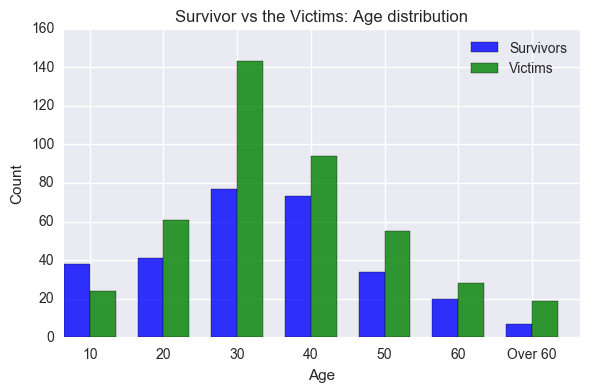

In [9]:
# data to plot
n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, lnumage, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Survivors')
 
rects2 = plt.bar(index + bar_width, dnumage, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Victims')
 
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survivor vs the Victims: Age distribution')
plt.xticks(index + bar_width, ('10','20','30','40','50','60','Over 60'))
plt.legend()
plt.tight_layout()
plt.show()

The only age range that has a higher survivor count than the deceased is the age under 10 range.

To show a more representative graph of the distributions, I decided to use percentage distribution to understand which age group was more distinctive for survivors or victims

In [10]:
age_under_10=[]
age_under_20=[]
age_under_30=[]
age_under_40=[]
age_under_50=[]
age_under_60=[]
age_over_60=[]
for i in agelp.Age:
    if i<10:
        age_under_10.append(i)
    elif i<20:
        age_under_20.append(i)
    elif i<30:
        age_under_30.append(i)
    elif i<40:
        age_under_40.append(i)
    elif i<50:
        age_under_50.append(i)
    elif i<60:
        age_under_60.append(i)
    else:
        age_over_60.append(i)
lnum_10=len(age_under_10)
lnum_20=len(age_under_20)
lnum_30=len(age_under_30)
lnum_40=len(age_under_40)
lnum_50=len(age_under_50)
lnum_60=len(age_under_60)
lnum_over=len(age_over_60)
ltotal=len(agelp.Age)
lnumageper=[lnum_10/ltotal,lnum_20/ltotal,lnum_30/ltotal,lnum_40/ltotal,lnum_50/ltotal,lnum_60/ltotal,lnum_over/ltotal]

In [11]:
dage_under_10=[]
dage_under_20=[]
dage_under_30=[]
dage_under_40=[]
dage_under_50=[]
dage_under_60=[]
dage_over_60=[]
for i in agedp.Age:
    if i<10:
        dage_under_10.append(i)
    elif i<20:
        dage_under_20.append(i)
    elif i<30:
        dage_under_30.append(i)
    elif i<40:
        dage_under_40.append(i)
    elif i<50:
        dage_under_50.append(i)
    elif i<60:
        dage_under_60.append(i)
    else:
        dage_over_60.append(i)
dnum_10=len(dage_under_10)
dnum_20=len(dage_under_20)
dnum_30=len(dage_under_30)
dnum_40=len(dage_under_40)
dnum_50=len(dage_under_50)
dnum_60=len(dage_under_60)
dtotal=len(agedp.Age)
dnumageper=[dnum_10/dtotal,dnum_20/dtotal,dnum_30/dtotal,dnum_40/dtotal,dnum_50/dtotal,dnum_60/dtotal,dnum_over/dtotal]

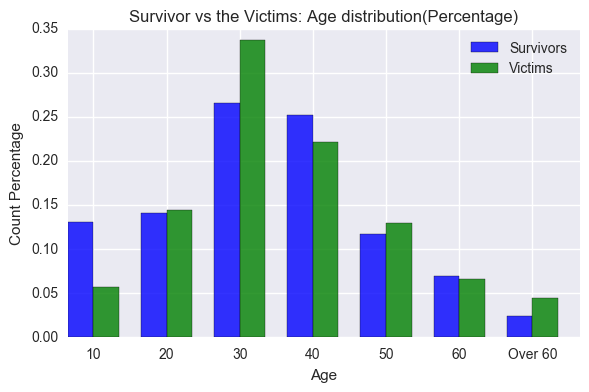

In [12]:
# data to plot
n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, lnumageper, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Survivors')
 
rects2 = plt.bar(index + bar_width, dnumageper, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Victims')
 
plt.xlabel('Age')
plt.ylabel('Count Percentage')
plt.title('Survivor vs the Victims: Age distribution(Percentage)')
plt.xticks(index + bar_width, ('10','20','30','40','50','60','Over 60'))
plt.legend()
plt.tight_layout()
plt.show()

This graph shows that a larger percentage of age between 0 to 10 and 50 to 60 showed higher percentage rates than the other age ranges.
However, other than the under 10, strictly younger children, the graph shows a very strikingly similar trend. Age was definitely not a strong indicator, other than it being for very young children.


# Passenger Class 
**Of Survivors**

In [14]:
lp.Pclass.describe()

count    342.000000
mean       1.950292
std        0.863321
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

**Of the Dead**

In [15]:
dp.Pclass.describe()

count    549.000000
mean       2.531876
std        0.735805
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

It looks like there are high number of Passenger 3 class number in death but evenly distributed for survivor class.
To study this effect further, I am going to visualize the data.

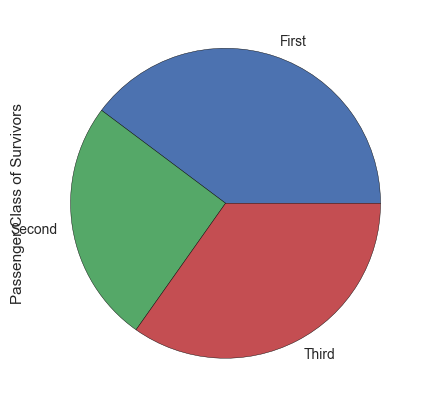

In [24]:
fc=[]
sc=[]
tc=[]
for i in lp.Pclass:
    if i == 1:
        fc.append(i)
    elif i == 2:
        sc.append(i)
    elif i == 3:
        tc.append(i)
cf=len(fc)
cs=len(sc)
ct=len(tc)
lpclass=pd.Series([cf,cs,ct], index=['First', 'Second', 'Third'], name='Passenger Class of Survivors')
lpclass.plot.pie(figsize=(5, 5))

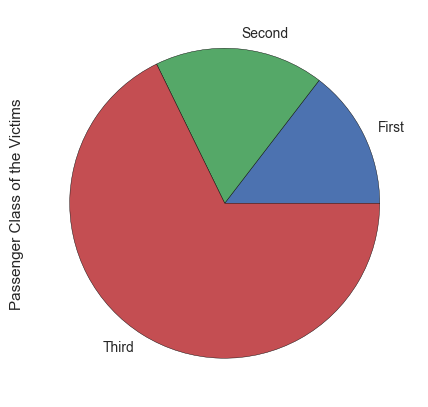

In [26]:
fc=[]
sc=[]
tc=[]
for i in dp.Pclass:
    if i == 1:
        fc.append(i)
    elif i == 2:
        sc.append(i)
    elif i == 3:
        tc.append(i)
cf=len(fc)
cs=len(sc)
ct=len(tc)
dpclass=pd.Series([cf,cs,ct], index=['First', 'Second', 'Third'], name='Passenger Class of the Victims')
dpclass.plot.pie(figsize=(5, 5))

The pie charts show that the largest component of survivors were first class. That is a pretty significant finding. Also, it is important to note that the majority of the victims were third class passengers. 

# Gender Distribution

In [16]:
lp.Sex.describe()

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

233 out of 342 were female an overwhelming difference compared to the male number of 109. This can be visualized better.

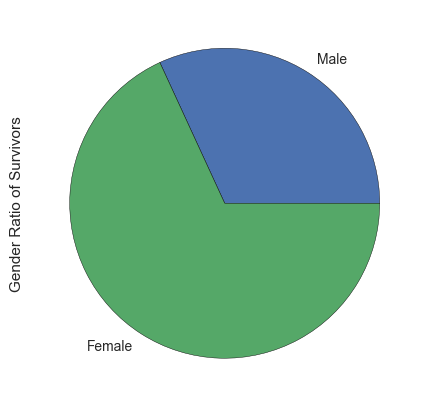

In [40]:
male=[]
female=[]
for i in lp.Sex:
    if i == "male":
        male.append(i)
    else:
        female.append(i)
ma=len(male)
fem=len(female)
lpclass=pd.Series([ma,fem], index=['Male','Female'], name='Gender Ratio of Survivors')
lpclass.plot.pie(figsize=(5, 5))

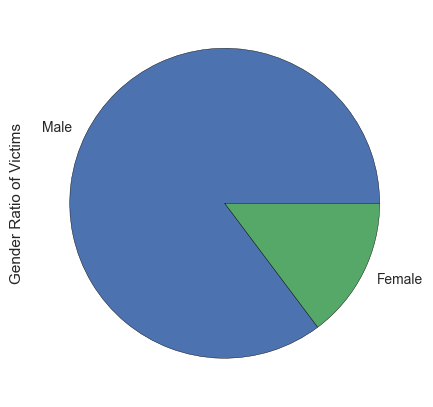

In [41]:
male=[]
female=[]
for i in dp.Sex:
    if i == "male":
        male.append(i)
    else:
        female.append(i)
ma=len(male)
fem=len(female)
dpclass=pd.Series([ma,fem], index=['Male','Female'], name='Gender Ratio of Victims')
dpclass.plot.pie(figsize=(5, 5))

The pie chart shows a verdict, a very large preference over female for Survivors and large proportion for male for the victim.

# Prediction machine

Based on the statistical description study above, it was noted that Age, Passenger Class, and Sex ratio had a strong correlation with survival rate. To test this and understand the weight of each of these factors, I ran a manual weighting prediction machine below to see which factors actually impacted the survival rate.

In [17]:
### prediction function based on rough estimates of weight which is based on the mean and the standard deviations
def prediction(i):
    score=0
    if abs(lp.Age.mean()-df.Age[i]) < abs(dp.Age.mean()-df.Age[i]):
        score+=0.1
    elif abs(lp.Age.mean()-df.Age[i]) > abs(dp.Age.mean()-df.Age[i]):
        score+=-0.1
    if abs(lp.Pclass.mean()-df.Pclass[i])<abs(dp.Pclass.mean()-df.Pclass[i]):
        score+=0.5
    elif abs(lp.Pclass.mean()-df.Pclass[i])>abs(dp.Pclass.mean()-df.Pclass[i]):
        score+=-.2
    if df.Sex[i]=="female":
        score+=0.3
    elif df.Sex[i]=="male":
        score+=-0.9
    return score
def accuracy(i,score):
    if score>0 and df.Survived[i]==1:
        boo=1
    elif score<0 and df.Survived[i]==0:
        boo=1
    else:
        boo=0
    return boo

percentage=[]
for i in df.PassengerId:
    percentage.append(accuracy(i-1,prediction(i-1)))
ans=sum(percentage)/len(percentage)
print(ans)


0.797979797979798


# Revised Prediction Machine

I switched up the conditions to improve the prediction rate. They were based on mean and mode of the statistical study result

In [37]:
### prediction function based on rough estimates of weight which is based on the mean and the standard deviations
def prediction(i):
    score=0
    if df.Age[i]<10:
        score+=0.4
    if df.Pclass[i]==1:
        score+=.2
    elif df.Pclass[i]==3:
        score+=-.7
    if df.Sex[i]=="female":
        score+=0.3
    elif df.Sex[i]=="male":
        score+=-0.3
    return score
def accuracy(i,score):
    if score>0 and df.Survived[i]==1:
        boo=1
    elif score<=0 and df.Survived[i]==0:
        boo=1
    else:
        boo=0
    return boo

percentage=[]
for i in df.PassengerId:
    percentage.append(accuracy(i-1,prediction(i-1)))
bro=sum(percentage)/len(percentage)
print(bro)

0.8002244668911336


The gender of a given person seems to play a bigger role in determining a factor of survival than passenger class or age in that respective order of importance.

# Conclusions

From this we can learn, also with the background of the Titanic Story, that Women, Children, and 1st Class passengers had priorities to the boat with differing levels of priority. We can also learn that data analytics can speculate and understand from just data which is very powerful in any context. 

By graphing the percentage distribution we could see that for age, only age under 10 could be understood as a factor that influenced survivor rate. By doing similar comparisons of subsetting and data visualization, my analysis can be strengthened for other factors as well.

The data analysis can be improved in lot of ways.
First, the data had a lot of missing values. Even within the data which was only a portion of the titanic passenger list, there were missing values in age, and other categories that made it less representative of the titanic as a whole.

Also, without using T-test and Z-test, the analysis done here are not statistically significant, as in the claims made are not proven in statistical terms. To make useful inferences with impact, T-test and Z-test are a must.

Final thing to note is that correlation is not the same for causation. Here we found that gender, age, and Passenger class had noticable shift in trends for survivors and victims. But it is not sound to say, since we observe a shift in trend for upper class passengers to be more likely to survive, rich people will live longer than poor people.